<a href="https://colab.research.google.com/github/Harsa-2004/FOML-LABORATORY/blob/main/ML_EXP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.UNIVARIATE,BIVARIATE, MULTIVARIATE

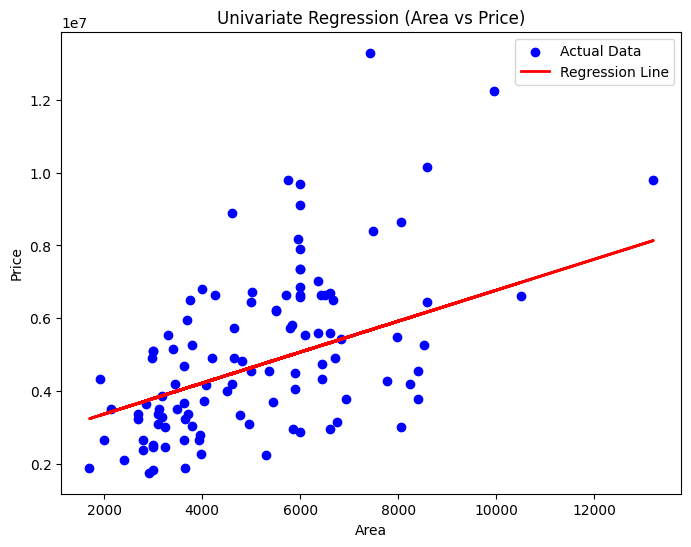

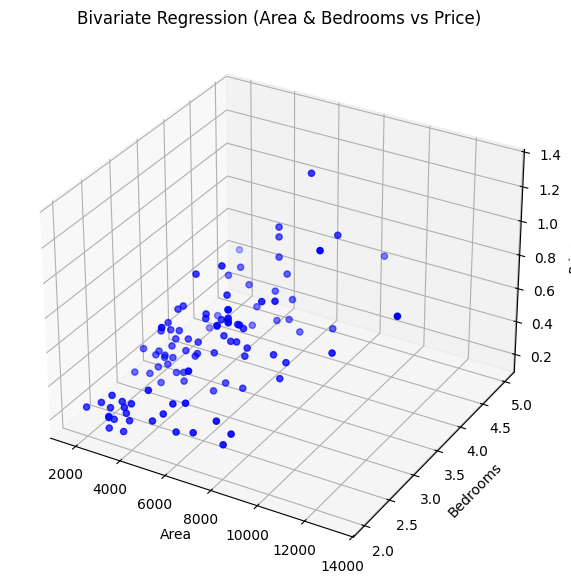

Multivariate Regression R² Score: 0.6495
Multivariate Regression MSE: 1771751116594.04


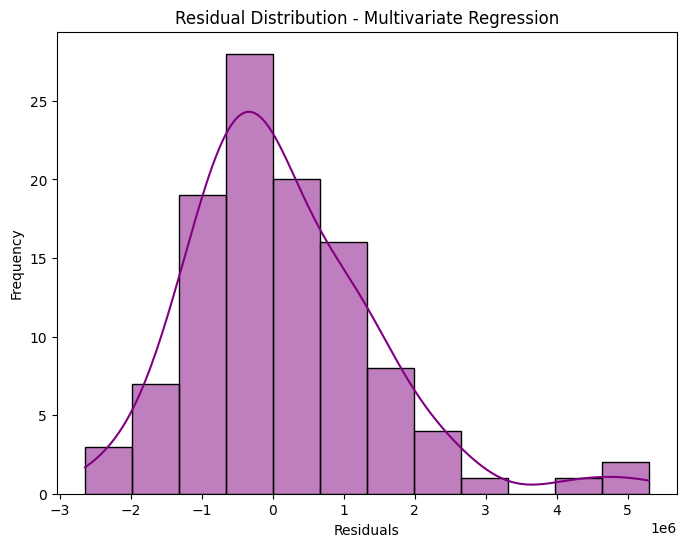

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load dataset
file_path = "/content/Housing.csv"
df = pd.read_csv(file_path)

# Step 2: Preprocess data (convert categorical variables)
le = LabelEncoder()
df['mainroad'] = le.fit_transform(df['mainroad'])
df['guestroom'] = le.fit_transform(df['guestroom'])
df['basement'] = le.fit_transform(df['basement'])
df['hotwaterheating'] = le.fit_transform(df['hotwaterheating'])
df['airconditioning'] = le.fit_transform(df['airconditioning'])
df['prefarea'] = le.fit_transform(df['prefarea'])
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])

# Step 3: Univariate Regression (Price vs Area)
X_uni = df[['area']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X_uni, y, test_size=0.2, random_state=42)
model_uni = LinearRegression()
model_uni.fit(X_train, y_train)
y_pred_uni = model_uni.predict(X_test)

# Plot Univariate Regression
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred_uni, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Univariate Regression (Area vs Price)')
plt.legend()
plt.show()

# Step 4: Bivariate Regression (Price vs Area & Bedrooms)
X_bi = df[['area', 'bedrooms']]
X_train, X_test, y_train, y_test = train_test_split(X_bi, y, test_size=0.2, random_state=42)
model_bi = LinearRegression()
model_bi.fit(X_train, y_train)
y_pred_bi = model_bi.predict(X_test)

# Plot Bivariate Regression in 3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['area'], X_test['bedrooms'], y_test, color='blue', label='Actual Data')
ax.set_xlabel('Area')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('Bivariate Regression (Area & Bedrooms vs Price)')
plt.show()

# Step 5: Multivariate Regression (Using all features)
X_multi = df.drop(columns=['price'])
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)
y_pred_multi = model_multi.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred_multi)
r2 = r2_score(y_test, y_pred_multi)
print(f"Multivariate Regression R² Score: {r2:.4f}")
print(f"Multivariate Regression MSE: {mse:.2f}")

# Residual Plot
residuals = y_test - y_pred_multi
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution - Multivariate Regression')
plt.show()

2.LOGISTIC REGRESSION

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/accident.csv")
df

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0
...,...,...,...,...,...,...
195,69,Female,111.0,No,Yes,1
196,30,Female,51.0,No,Yes,1
197,58,Male,110.0,No,Yes,1
198,20,Male,103.0,No,Yes,1


In [ ]:
df.shape

(200, 6)

In [ ]:
df.size

1200

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,1
Speed_of_Impact,3
Helmet_Used,0
Seatbelt_Used,0
Survived,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df["Gender"]=lb.fit_transform(df["Gender"])
df["Helmet_Used"]=lb.fit_transform(df["Helmet_Used"])
df["Seatbelt_Used"]=lb.fit_transform(df["Seatbelt_Used"])
df

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,0,27.0,0,0,1
1,69,0,46.0,0,1,1
2,46,1,46.0,1,1,0
3,32,1,117.0,0,1,0
4,60,0,40.0,1,1,0
...,...,...,...,...,...,...
195,69,0,111.0,0,1,1
196,30,0,51.0,0,1,1
197,58,1,110.0,0,1,1
198,20,1,103.0,0,1,1


In [ ]:
df.fillna(df.mean(),inplace=True)

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Speed_of_Impact,0
Helmet_Used,0
Seatbelt_Used,0
Survived,0


In [ ]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,:-1]
y=df["Survived"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x_train=s.fit_transform(x_train)
x_test=s.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)

In [ ]:
print("Accuracy Score:",accuracy)
print("Confusion matrix:",conf_matrix)
print("Classification report:",report)

Accuracy Score: 0.55
Confusion matrix: [[15  7]
 [11  7]]
Classification report:               precision    recall  f1-score   support

           0       0.58      0.68      0.62        22
           1       0.50      0.39      0.44        18

    accuracy                           0.55        40
   macro avg       0.54      0.54      0.53        40
weighted avg       0.54      0.55      0.54        40



In [ ]:
sample_input=x_test[0].reshape(1,-1)
predicted_output=model.predict(sample_input)
predicted_proba=model.predict_proba(sample_input)

In [ ]:
print("Sample Input",sample_input)
print("Predicted Output 0-Died and 1 for survived:",predicted_output)

Sample Input [[-0.13532385  1.02532046  0.36603833 -1.13389342  0.83793058]]
Predicted Output 0-Died and 1 for survived: [1]


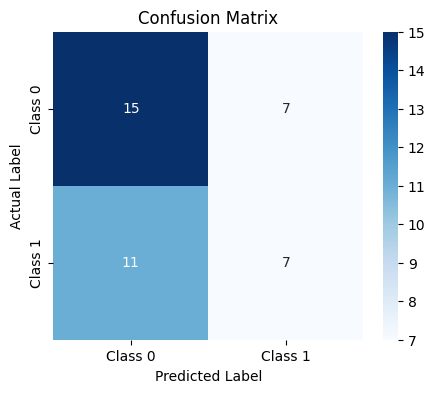

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",xticklabels=["Class 0","Class 1"],yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

3.SIMPLE LINEAR REGRESSION USING LEAST SQUARE METHOD





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("/content/Advertising Budget and Sales.csv")
df

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
TV Ad Budget ($),0
Radio Ad Budget ($),0
Newspaper Ad Budget ($),0
Sales ($),0


In [ ]:
df.rename(columns={'Unnamed: 0':'S.No'},inplace=True)

In [ ]:
x=df["TV Ad Budget ($)"]
y=df["Sales ($)"]

In [ ]:
N=len(x)
sum_x=np.sum(x)
sum_y=np.sum(y)
sum_xy=np.sum(x*y)
sum_x2=np.sum(x**2)

In [ ]:
m=(N*sum_xy-sum_x*sum_y)/(N*sum_x2-sum_x**2)
c=(sum_y-m*sum_x)/N

In [ ]:
y_pred=m*x+c

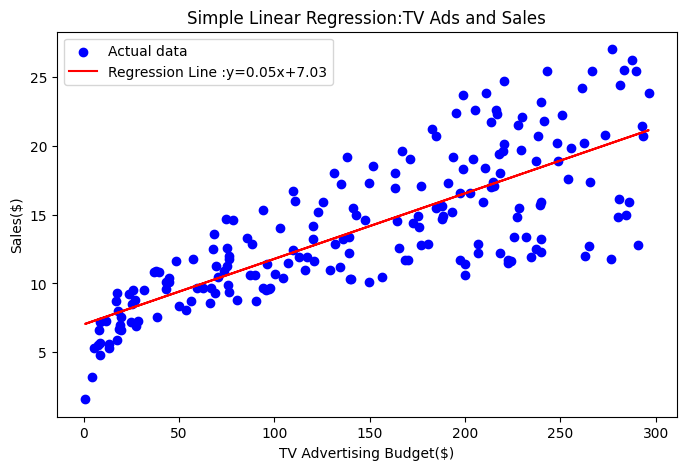

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(x,y,color="blue",label="Actual data")
plt.plot(x,y_pred,color="red",label=f'Regression Line :y={m:.2f}x+{c:.2f}')
plt.xlabel('TV Advertising Budget($)')
plt.ylabel('Sales($)')
plt.legend()
plt.title("Simple Linear Regression:TV Ads and Sales")
plt.show()

In [ ]:
print(f'Slope(m):{m:.2f}')
print(f'Intercept(c):{c:.2f}')

Slope(m):0.05
Intercept(c):7.03


4.SINGLE LAYER PERCEPTRON

In [ ]:
import numpy as np

# Step 1: Initialize input features (X) and target labels (y)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([0, 0, 0, 1])  # AND logic gate output

# Step 2: Initialize weights and bias
weights = np.random.rand(2)
bias = np.random.rand(1)
learning_rate = 0.1

# Step 3: Define activation function (step function)
def step_function(x):
    return 1 if x >= 0 else 0

# Step 4: Train the perceptron using the Perceptron Learning Algorithm
epochs = 10
for epoch in range(epochs):
    for i in range(len(X)):
        # Step 5: Compute weighted sum
        weighted_sum = np.dot(X[i], weights) + bias

        # Step 6: Apply activation function
        y_pred = step_function(weighted_sum)

        # Step 7: Compute error
        error = y[i] - y_pred

        # Step 8: Update weights and bias
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

# Step 9: Make predictions
for i in range(len(X)):
    output = step_function(np.dot(X[i], weights) + bias)
    print(f"Input: {X[i]}, Predicted Output: {output}")

# Step 10: Final weights and bias
print("Final Weights:", weights)
print("Final Bias:", bias)

Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 0
Input: [1 0], Predicted Output: 0
Input: [1 1], Predicted Output: 1
Final Weights: [0.10235869 0.10996892]
Final Bias: [-0.21110991]


5.MULTILAYER PERCEPTRON

In [ ]:
import numpy as np

# Step 1: Inputs (X) and Targets (y)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])  # AND Gate Output

# Step 2: Initialize parameters
np.random.seed(42)
input_size = 2
hidden_size = 2
output_size = 1
learning_rate = 0.1

# Weights and biases
W1 = np.random.rand(input_size, hidden_size)
b1 = np.random.rand(1, hidden_size)
W2 = np.random.rand(hidden_size, output_size)
b2 = np.random.rand(1, output_size)

# Activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)

# Step 3: Train the network
epochs = 10000
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Compute error
    error = y - a2

    # Backpropagation
    d_output = error * sigmoid_deriv(a2)
    d_hidden = d_output.dot(W2.T) * sigmoid_deriv(a1)

    # Update weights and biases
    W2 += a1.T.dot(d_output) * learning_rate
    b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    W1 += X.T.dot(d_hidden) * learning_rate
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

# Step 4: Final predictions
print("Final predictions after training:")
for i in range(len(X)):
    hidden = sigmoid(np.dot(X[i], W1) + b1)
    output = sigmoid(np.dot(hidden, W2) + b2)
    print(f"Input: {X[i]}, Predicted: {output.round()}")

# Step 5: Final Weights & Biases
print("\nFinal W1:\n", W1)
print("Final b1:\n", b1)
print("Final W2:\n", W2)
print("Final b2:\n", b2)


Final predictions after training:
Input: [0 0], Predicted: [[0.]]
Input: [0 1], Predicted: [[0.]]
Input: [1 0], Predicted: [[0.]]
Input: [1 1], Predicted: [[1.]]

Final W1:
 [[-1.3324993   3.59051705]
 [-1.22219386  3.64472569]]
Final b1:
 [[ 1.50988453 -5.26803754]]
Final W2:
 [[-2.8596321 ]
 [ 8.14131783]]
Final b2:
 [[-3.20525465]]


6.FACE RECOGNITION USING SVM CLASSIFIER

Face Recognition Model Accuracy: 81.01%


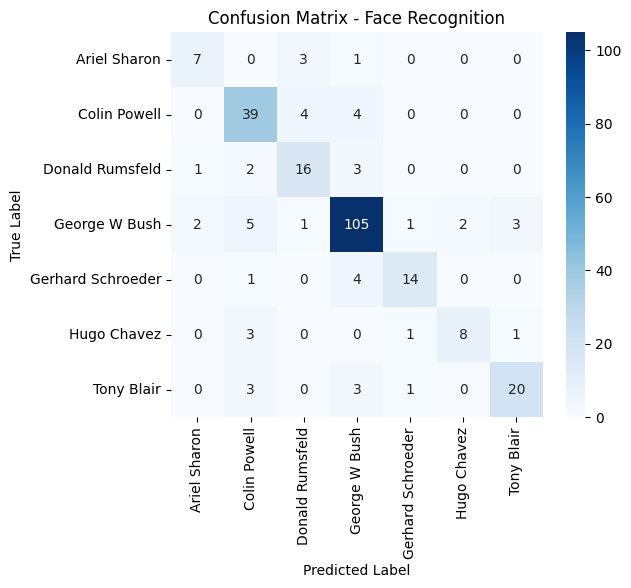

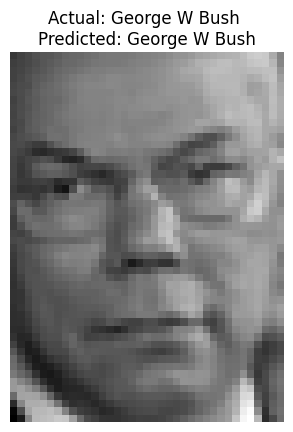

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Labeled Faces in the Wild (LFW) dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.images  # Face images (Gray-scale)
y = lfw_people.target  # Person labels
target_names = lfw_people.target_names  # Names of people

# Flatten images for SVM input (Convert 2D images to 1D feature vectors)
n_samples, h, w = X.shape
X = X.reshape(n_samples, h * w)

# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA (Principal Component Analysis) for dimensionality reduction
n_components = 150  # Reduce features to 150 dimensions
pca = PCA(n_components=n_components, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train SVM classifier
svm_classifier = SVC(kernel="linear", class_weight="balanced", probability=True)
svm_classifier.fit(X_train_pca, y_train)

# Test the model
y_pred = svm_classifier.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Face Recognition Model Accuracy: {accuracy * 100:.2f}%")

# Display Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Face Recognition")
plt.show()

# Test with a sample image
sample_idx = 5  # Choose any index from test set
plt.imshow(lfw_people.images[sample_idx], cmap="gray")
plt.title(f"Actual: {target_names[y_test[sample_idx]]} \nPredicted: {target_names[y_pred[sample_idx]]}")
plt.axis("off")
plt.show()

7.DECISION TREE

Decision Tree Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



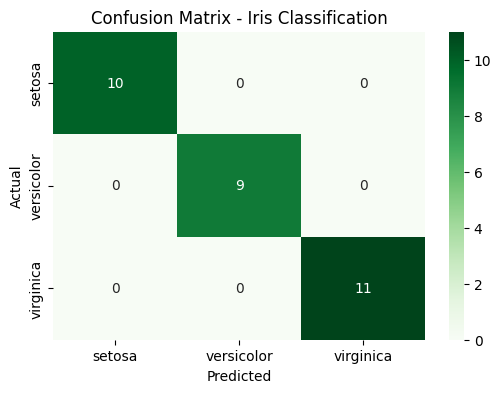

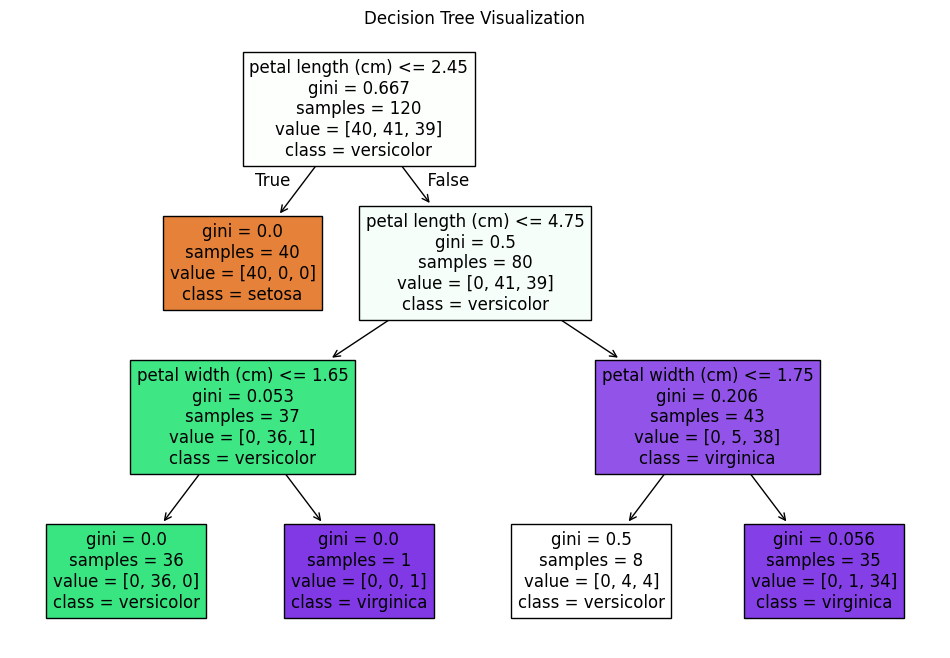

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Step 1: Load the dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Decision Tree model
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = clf.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

# Step 6: Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Iris Classification")
plt.show()

# Step 7: Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=feature_names, class_names=target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()


8.BOOSTING ALGORITHM IMPLEMENTATION
  

Gradient Boosting Accuracy: 94.44%

Classification Report:
               precision    recall  f1-score   support

     class_0       0.93      1.00      0.97        14
     class_1       0.93      0.93      0.93        14
     class_2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



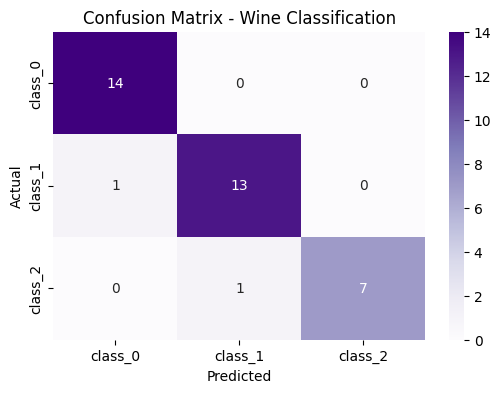

In [ ]:
# Step 1: Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Load the dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

# Step 3: Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = gb_model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

# Step 7: Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Wine Classification")
plt.show()


KNN Accuracy (Breast Cancer Dataset): 94.74%
              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



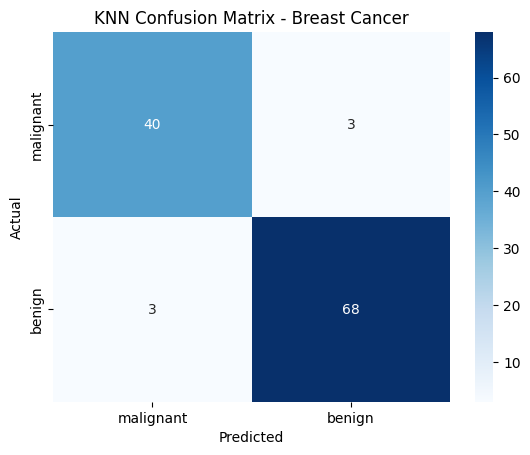

In [ ]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
target_names = cancer.target_names

# Step 3: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 6: Predictions and Evaluation
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy (Breast Cancer Dataset): {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred, target_names=target_names))

# Step 7: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title("KNN Confusion Matrix - Breast Cancer")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


9.K NEAREST NEIGHBOURS AND KMEANS CLUSTERING


K MEANS CLUSTERING


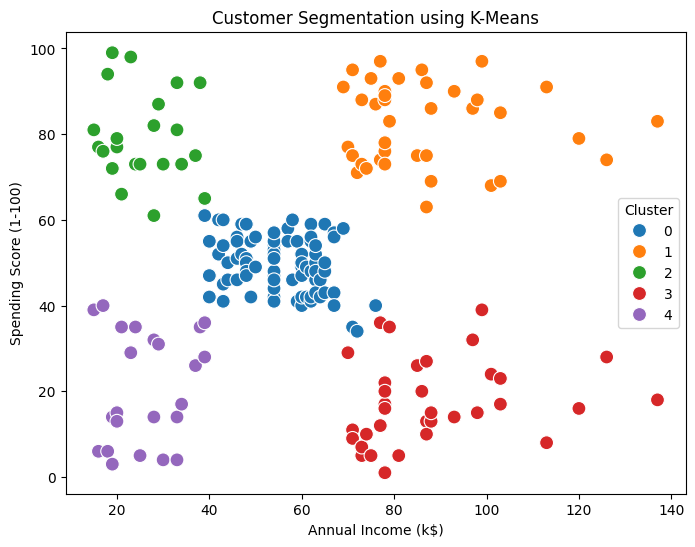

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 2: Load the dataset
# You can download from: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
url = "/content/Mall_Customers.csv"
df = pd.read_csv(url)

# Step 3: Select relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 4: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Step 6: Add clusters to original data
df['Cluster'] = clusters

# Step 7: Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='tab10', s=100)
plt.title("Customer Segmentation using K-Means")
plt.show()



K NEAREST NEIGHBOUR

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       1.00      1.00      1.00        14
           2       0.88      0.82      0.85        17

    accuracy                           0.88        42
   macro avg       0.88      0.88      0.88        42
weighted avg       0.88      0.88      0.88        42



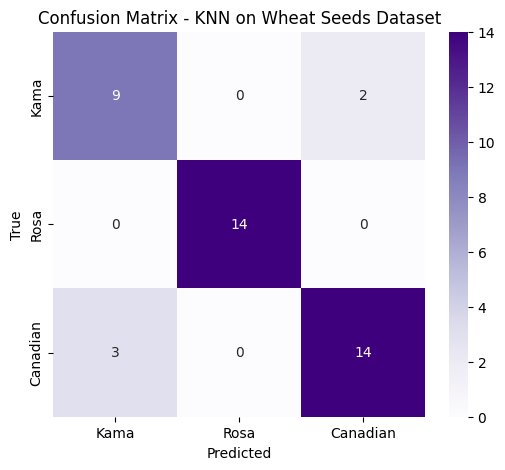

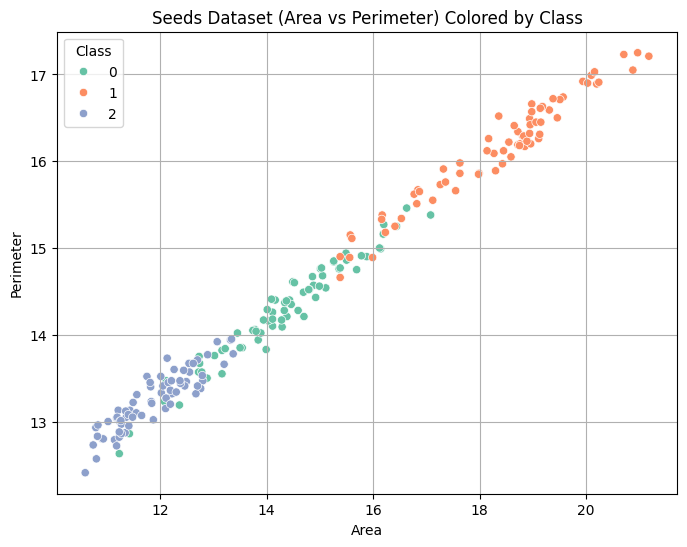

In [ ]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Step 2: Load Seeds Dataset (UCI format, no headers)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
columns = ['Area', 'Perimeter', 'Compactness', 'Kernel_Length', 'Kernel_Width', 'Asymmetry_Coeff', 'Kernel_Groove_Length', 'Class']
df = pd.read_csv(url, sep="\s+", names=columns)

# Step 3: Features and target
X = df.drop('Class', axis=1)
y = df['Class'] - 1  # Classes are 1, 2, 3 → make it 0, 1, 2

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Step 7: Make predictions
y_pred = knn.predict(X_test_scaled)

# Step 8: Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 9: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Kama', 'Rosa', 'Canadian'],
            yticklabels=['Kama', 'Rosa', 'Canadian'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - KNN on Wheat Seeds Dataset")
plt.show()
# Step 10: Visualization (2D projection using first 2 features)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X['Area'], y=X['Perimeter'], hue=y, palette='Set2')
plt.title("Seeds Dataset (Area vs Perimeter) Colored by Class")
plt.xlabel("Area")
plt.ylabel("Perimeter")
plt.legend(title="Class")
plt.grid(True)
plt.show()


10.DIMENSIONALITY REDUCTION USING PCA

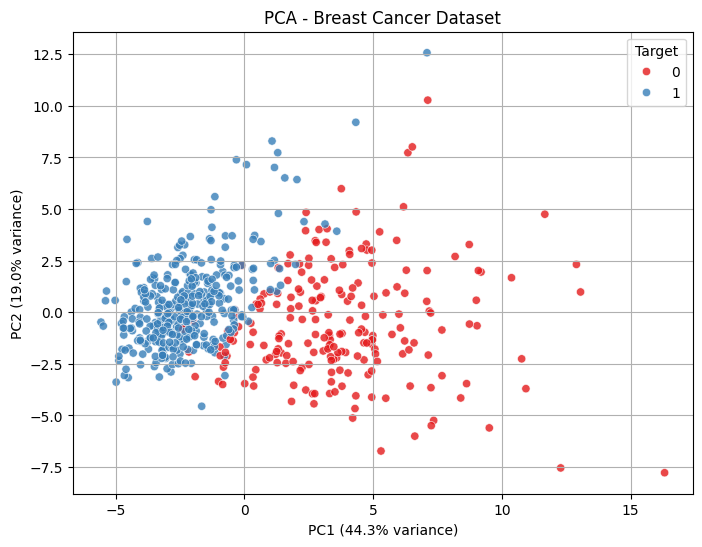

Explained Variance Ratio: [0.44272026 0.18971182]
Total Variance Retained: 0.6324320765155944


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 2: Load the Dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)  # 0 = malignant, 1 = benign
target_names = data.target_names

# Step 3: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Step 5: Convert to DataFrame for Plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Target'] = y

# Step 6: Visualize the 2D PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Target', palette='Set1', alpha=0.8)
plt.title('PCA - Breast Cancer Dataset')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.grid(True)
plt.show()

# Step 7: Explained Variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Retained:", np.sum(pca.explained_variance_ratio_))


11.MINI PROJECT USING KERAS

In [ ]:
# Sure! Here's a full dataset script you can run to generate a text dataset.

# Dataset: Larger version for Emoji Sentiment Classification

import pandas as pd
from google.colab import files
# Prepare texts and labels
texts = [
    # Happy Sentences
    "I am feeling so happy today!",
    "This is the best thing ever!",
    "I love spending time with my friends.",
    "What a wonderful experience!",
    "I'm super excited for the trip.",
    "Today is such a beautiful day.",
    "I can't stop smiling.",
    "Life is good.",
    "I'm full of positive energy.",
    "Absolutely thrilled about the results!",

    # Sad Sentences
    "I feel very sad right now.",
    "Today has been terrible.",
    "I'm heartbroken.",
    "Everything seems so gloomy.",
    "Feeling lonely and lost.",
    "Tears won't stop falling.",
    "I feel empty inside.",
    "It's a really rough day.",
    "I just want to cry.",
    "Nothing seems right anymore.",

    # Angry Sentences
    "I'm extremely angry about this!",
    "Why is everything going wrong?",
    "I'm so mad right now.",
    "This situation is infuriating.",
    "I can't stand this anymore.",
    "Feeling absolutely furious.",
    "I'm boiling with rage.",
    "Everything is making me irritated.",
    "I'm frustrated beyond words.",
    "My patience is running out.",

    # Surprised Sentences
    "Wow, I can't believe this!",
    "That was totally unexpected!",
    "Such a shocking event.",
    "Oh my goodness, really?",
    "What a big surprise!",
    "I am astonished by the news.",
    "I wasn't expecting that.",
    "This is mind-blowing!",
    "I'm amazed at what just happened.",
    "Absolutely stunned!"
]

labels = [
    "Happy" for _ in range(10)
] + [
    "Sad" for _ in range(10)
] + [
    "Angry" for _ in range(10)
] + [
    "Surprised" for _ in range(10)
]

# Create a DataFrame
data = pd.DataFrame({
    'text': texts,
    'label': labels
})

# Save as CSV
output_path = 'emoji_sentiment_dataset.csv'
data.to_csv(output_path, index=False)

# Download the file automatically
files.download(output_path)

print(f"Dataset created and will be downloaded: {output_path}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Dataset created and will be downloaded: emoji_sentiment_dataset.csv


In [ ]:
import pandas as pd
df=pd.read_csv("/content/emoji_sentiment_dataset.csv")
df

,text,label
0,I am feeling so happy today!,Happy
1,This is the best thing ever!,Happy
2,I love spending time with my friends.,Happy
3,What a wonderful experience!,Happy
4,I'm super excited for the trip.,Happy
5,Today is such a beautiful day.,Happy
6,I can't stop smiling.,Happy
7,Life is good.,Happy
8,I'm full of positive energy.,Happy
9,Absolutely thrilled about the results!,Happy


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset (Use the dataset you created or the one you've downloaded)
df = pd.read_csv('/content/emoji_sentiment_dataset.csv')  # Adjust the path if needed
df

,text,label
0,I am feeling so happy today!,Happy
1,This is the best thing ever!,Happy
2,I love spending time with my friends.,Happy
3,What a wonderful experience!,Happy
4,I'm super excited for the trip.,Happy
5,Today is such a beautiful day.,Happy
6,I can't stop smiling.,Happy
7,Life is good.,Happy
8,I'm full of positive energy.,Happy
9,Absolutely thrilled about the results!,Happy


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

# Tokenizer for text data
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['text'])
padded_sequences = pad_sequences(sequences, padding='post')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['label_encoded'], test_size=0.2, random_state=42)


In [ ]:

# Load GloVe embeddings (Make sure you have this file in your directory)
embeddings_index = {}
with open('glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Prepare embedding matrix
embedding_dim = 100  # GloVe 100-dimensional vectors
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))

for word, i in tokenizer.word_index.items():
    if i < 1000:  # Ensure the word index is within the vocab size
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Build the model with GloVe embeddings
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1,  # Vocabulary size
              output_dim=embedding_dim,
              weights=[embedding_matrix],  # Pre-trained GloVe embeddings
              input_length=padded_sequences.shape[1],
              trainable=False),  # Keep embeddings frozen (you can set to True if you want to fine-tune)
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),  # Added more neurons
    Dense(32, activation='relu'),  # Added another layer for complexity
    Dense(len(label_encoder.classes_), activation='softmax')  # Adjust the output layer for your sentiment classes
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.1667 - loss: 1.4258 - val_accuracy: 0.3750 - val_loss: 1.3564
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.3750 - loss: 1.3861 - val_accuracy: 0.2500 - val_loss: 1.3618
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.3958 - loss: 1.3688 - val_accuracy: 0.1250 - val_loss: 1.3686
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.3750 - loss: 1.3535 - val_accuracy: 0.1250 - val_loss: 1.3755
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3333 - loss: 1.3275 - val_accuracy: 0.1250 - val_loss: 1.3806
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.3750 - loss: 1.3070 - val_accuracy: 0.1250 - val_loss: 1.3882
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4375 - loss: 1.2884 - val_accuracy: 0.1250 - val_loss: 1.3880
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5000 - loss: 1.2605 - val_accuracy: 0.1250 - val_loss: 1.3903
E

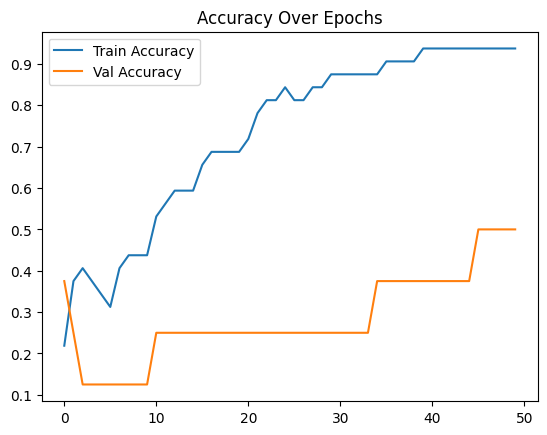

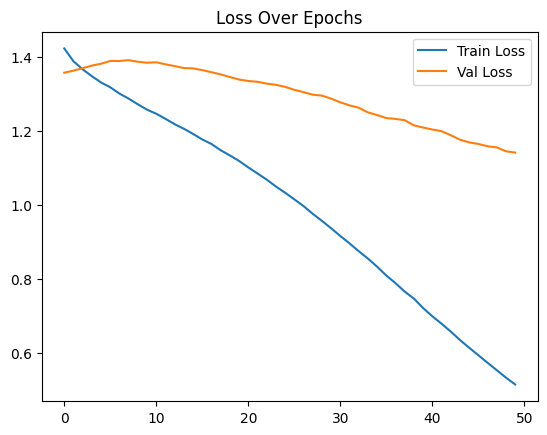

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5000 - loss: 1.1404
Test Accuracy: 50.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
Text: I am so happy today! => Predicted Sentiment: Happy
Text: I feel really sad. => Predicted Sentiment: Sad
Text: This is amazing! => Predicted Sentiment: Happy
Text: I am very angry. => Predicted Sentiment: Angry


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Plot training & validation accuracy/loss curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend(loc='best')
plt.title('Accuracy Over Epochs')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(loc='best')
plt.title('Loss Over Epochs')
plt.show()

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Test predictions on new sample texts
sample_texts = ["I am so happy today!", "I feel really sad.", "This is amazing!", "I am very angry."]
sample_seq = tokenizer.texts_to_sequences(sample_texts)
sample_pad = pad_sequences(sample_seq, padding='post', maxlen=padded_sequences.shape[1])

predictions = model.predict(sample_pad)
predicted_labels = label_encoder.inverse_transform(predictions.argmax(axis=1))

for text, sentiment in zip(sample_texts, predicted_labels):
    print(f"Text: {text} => Predicted Sentiment: {sentiment}")

In [ ]:
# Save the entire model (architecture + weights)
model.save('sentiment_model.h5')
